## My Examples querying data from Pandas Dataframes


### This is using some zip code data from the IRS website - which can be used to validate addresses

In [1]:
import pandas as pd
import re

# Sample data
data = {
    'State': [
        'Alabama', 'Alabama', 'Alaska', 'Arizona', 'Arizona', 'Arizona', 'Arizona', 'Arkansas', 'California', 'California',
        'California', 'Colorado', 'Connecticut', 'Connecticut', 'Delaware', 'District of Columbia', 'District of Columbia',
        'District of Columbia', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Georgia', 'Georgia',
        'Hawaii', 'Hawaii', 'Idaho', 'Illinois', 'Illinois', 'Indiana', 'Iowa', 'Iowa', 'Kansas', 'Kansas', 'Kentucky',
        'Louisiana', 'Louisiana', 'Louisiana', 'Maine', 'Maryland', 'Maryland', 'Massachusetts', 'Massachusetts', 'Michigan',
        'Minnesota', 'Minnesota', 'Mississippi', 'Missouri', 'Missouri', 'Missouri', 'Montana', 'Nebraska', 'Nebraska', 'Nevada',
        'Nevada', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New Mexico', 'New Mexico', 'New York', 'New York', 'New York',
        'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oklahoma', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Texas', 'Texas', 'Utah', 'Vermont', 'Vermont',
        'Virginia', 'Virginia', 'Washington', 'Washington', 'West Virginia', 'Wisconsin', 'Wisconsin', 'Wisconsin', 'Wyoming', 'Wyoming'
    ],
    'Abbr.': [
        'AL', 'AL', 'AK', 'AZ', 'AZ', 'AZ', 'AZ', 'AR', 'CA', 'CA', 'CA', 'CO', 'CT', 'CT', 'DE', 'DC', 'DC', 'DC', 'FL', 'FL',
        'FL', 'FL', 'FL', 'FL', 'FL', 'GA', 'GA', 'HI', 'HI', 'ID', 'IL', 'IL', 'IN', 'IA', 'IA', 'KS', 'KS', 'KY', 'LA', 'LA',
        'LA', 'ME', 'MD', 'MD', 'MA', 'MA', 'MI', 'MN', 'MN', 'MS', 'MO', 'MO', 'MO', 'MT', 'NE', 'NE', 'NV', 'NV', 'NV', 'NH',
        'NJ', 'NM', 'NM', 'NM', 'NY', 'NY', 'NY', 'NC', 'ND', 'OH', 'OK', 'OK', 'OK', 'OR', 'PA', 'RI', 'RI', 'SC', 'SD', 'TN',
        'TX', 'TX', 'TX', 'UT', 'VT', 'VT', 'VA', 'VA', 'WA', 'WA', 'WV', 'WI', 'WI', 'WI', 'WY', 'WY'
    ],
    'Code': [
        '350nn-352nn', '354nn-369nn', '995nn-999nn', '850nn-853nn', '855nn-857nn', '859nn-850nn', '863nn-865nn', '716nn-729nn',
        '900nn-908nn', '910nn-928nn', '930nn-961nn', '800nn-816nn', '060nn-06389', '06391-069nn', '197nn-199nn', '200nn-200nn',
        '202nn-205nn', '569nn-569nn', '320nn-339nn', '341nn-341nn', '342nn-342nn', '344nn-344nn', '346nn-346nn', '347nn-347nn',
        '349nn-349nn', '300nn-319nn', '398nn-399nn', '967nn-967nn', '968nn-968nn', '832nn-838nn', '600nn-620nn', '622nn-629nn',
        '460nn-479nn', '500nn-516nn', '520nn-528nn', '660nn-662nn', '664nn-679nn', '400nn-427nn', '700nn-701nn', '703nn-708nn',
        '710nn-714nn', '039nn-049nn', '206nn-212nn', '214nn-219nn', '010nn-027nn', '055nn-055nn', '480nn-499nn', '550nn-551nn',
        '553nn-567nn', '386nn-397nn', '630nn-631nn', '633nn-641nn', '644nn-658nn', '590nn-599nn', '680nn-681nn', '683nn-693nn',
        '889nn-891nn', '893nn-895nn', '897nn-898nn', '030nn-038nn', '070nn-089nn', '870nn-871nn', '873nn-875nn', '877nn-884nn',
        '005nn-005nn', '06390-06390', '100nn-149nn', '270nn-289nn', '580nn-588nn', '430nn-459nn', '730nn-731nn', '734nn-741nn',
        '743nn-749nn', '970nn-979nn', '150nn-196nn', '028nn-028nn', '029nn-029nn', '290nn-299nn', '570nn-577nn', '370nn-385nn',
        '733nn-733nn', '750nn-770nn', '772nn-799nn', '840nn-847nn', '050nn-054nn', '056nn-059nn', '201nn-201nn', '220nn-246nn',
        '980nn-986nn', '988nn-994nn', '247nn-268nn', '530nn-532nn', '534nn-535nn', '537nn-549nn', '820nn-831nn', '834nn-834nn'
    ]
}

df = pd.DataFrame(data)



In [15]:
## Rename columns for state abbreviations
df.rename(columns={'Abbr.':'ABBR'}, errors='raise', inplace='TRUE')


In [25]:
# Expand the Code column
# Function to expand ZIP ranges
def expand_zip_range(zip_range):
    start, end = zip_range.split('-')
    start_num = int(start[:-2])  # Remove the 'nn' and convert to an integer
    end_num = int(end[:-2])  # Remove the 'nn' and convert to an integer
    return [str(num).zfill(3) for num in range(start_num, end_num + 1)]



In [27]:
# Expand the ZIP column
df['Expanded ZIP'] = df['Code'].apply(expand_zip_range)


In [28]:
df.head()


,State,ABBR,Code,Expanded ZIP
0,Alabama,AL,350nn-352nn,"[350, 351, 352]"
1,Alabama,AL,354nn-369nn,"[354, 355, 356, 357, 358, 359, 360, 361, 362, ..."
2,Alaska,AK,995nn-999nn,"[995, 996, 997, 998, 999]"
3,Arizona,AZ,850nn-853nn,"[850, 851, 852, 853]"
4,Arizona,AZ,855nn-857nn,"[855, 856, 857]"


In [29]:
# Explode the DataFrame to create multiple rows for each ZIP code
df = df.explode('Expanded ZIP')

In [32]:
#help(df.explode)

In [33]:
df.head()  

,State,ABBR,Code,Expanded ZIP
0,Alabama,AL,350nn-352nn,350
0,Alabama,AL,350nn-352nn,351
0,Alabama,AL,350nn-352nn,352
1,Alabama,AL,354nn-369nn,354
1,Alabama,AL,354nn-369nn,355


In [16]:
df.head()

,State,ABBR,Code
0,Alabama,AL,350nn-352nn
1,Alabama,AL,354nn-369nn
2,Alaska,AK,995nn-999nn
3,Arizona,AZ,850nn-853nn
4,Arizona,AZ,855nn-857nn


In [37]:
## Example using dataframe.query example
#print(df.query("State == 'California'"))
#print(df.query("ABBR == 'CA'"))
print(df.query("State == 'Hawaii'"))
#print(df.query("ABBR == 'CA'"))


     State ABBR         Code Expanded ZIP
27  Hawaii   HI  967nn-967nn          967
28  Hawaii   HI  968nn-968nn          968


In [39]:
df2 = df.query("State == 'California'")
df2.head()

,State,ABBR,Code,Expanded ZIP
8,California,CA,900nn-908nn,900
8,California,CA,900nn-908nn,901
8,California,CA,900nn-908nn,902
8,California,CA,900nn-908nn,903
8,California,CA,900nn-908nn,904


In [19]:
# Filter columns - This example filters colums not rows
df2=df.filter(items=['Code','Wisconsin'])
print(df2)

           Code
0   350nn-352nn
1   354nn-369nn
2   995nn-999nn
3   850nn-853nn
4   855nn-857nn
..          ...
91  530nn-532nn
92  534nn-535nn
93  537nn-549nn
94  820nn-831nn
95  834nn-834nn

[96 rows x 1 columns]


In [22]:
# This example filters rows
df2=df.filter(items=[3,5], axis=0)
print(df2)

     State ABBR         Code
3  Arizona   AZ  850nn-853nn
5  Arizona   AZ  859nn-850nn


In [44]:
df = df.reset_index(drop=True)

In [45]:
df.head()

,State,ABBR,Code,Expanded ZIP
0,Alabama,AL,350nn-352nn,350
1,Alabama,AL,350nn-352nn,351
2,Alabama,AL,350nn-352nn,352
3,Alabama,AL,354nn-369nn,354
4,Alabama,AL,354nn-369nn,355


## Filter and use with loc[] and iloc[]

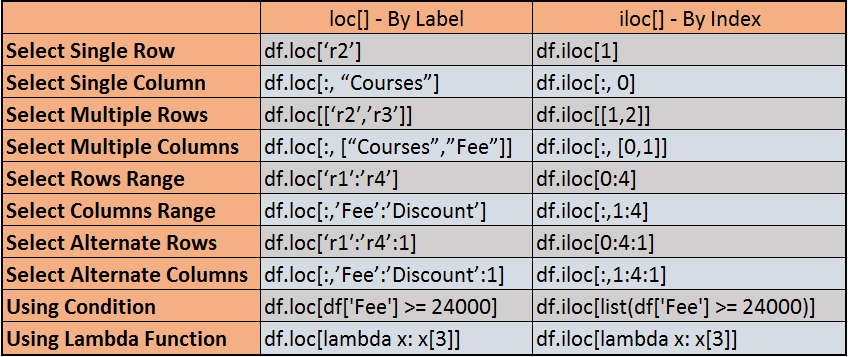

In [49]:
# Select Single Row by Index Label
print(df.loc[0])

# Select Single Row by Index
print(df.iloc[1])


State               Alabama
ABBR                     AL
Code            350nn-352nn
Expanded ZIP            350
Name: 0, dtype: object
State               Alabama
ABBR                     AL
Code            350nn-352nn
Expanded ZIP            351
Name: 1, dtype: object


In [ ]:
Here are examples using loc and iloc to filter data 

In [50]:
# Using Conditions
print(df.loc[df['State'] == 'Hawaii'])

      State ABBR         Code Expanded ZIP
194  Hawaii   HI  967nn-967nn          967
195  Hawaii   HI  968nn-968nn          968


In [51]:
print(df.iloc[list(df['State'] == 'Hawaii')])

      State ABBR         Code Expanded ZIP
194  Hawaii   HI  967nn-967nn          967
195  Hawaii   HI  968nn-968nn          968


In [54]:
df_hi_iloc = df.iloc[list(df['State'] == 'Hawaii')]

In [55]:
df_hi_iloc

,State,ABBR,Code,Expanded ZIP
194,Hawaii,HI,967nn-967nn,967
195,Hawaii,HI,968nn-968nn,968


In [40]:
#help(df.query)

In [56]:
df_hi_loc = df.loc[df['State'] == 'Hawaii']

In [57]:
df_hi_loc

,State,ABBR,Code,Expanded ZIP
194,Hawaii,HI,967nn-967nn,967
195,Hawaii,HI,968nn-968nn,968


## Here is an example of a function and applied to a dataframe column

In [61]:
def up_state(lstate):
    ustate = lstate.upper()
    return ustate

In [62]:
print(up_state('ka'))

KA


In [63]:
df['UpState'] = df['State'].apply(up_state)

In [64]:
df.head()

,State,ABBR,Code,Expanded ZIP,UpState
0,Alabama,AL,350nn-352nn,350,ALABAMA
1,Alabama,AL,350nn-352nn,351,ALABAMA
2,Alabama,AL,350nn-352nn,352,ALABAMA
3,Alabama,AL,354nn-369nn,354,ALABAMA
4,Alabama,AL,354nn-369nn,355,ALABAMA
